In [1]:
import pickle
with open('Cleaned_Sclaed_AmazonMusic_data.pkl', 'rb') as file:
    dataset = pickle.load(file)

dataset.head()

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,key,mode,time_signature,duration_ms
0,-0.212859,-1.732714,-1.341306,-0.174630,1.861715,-0.315507,1.546579,0.251632,0.461200,-0.341398,0.727049,-2.412542,-0.954017
1,-1.131650,-1.750687,-1.778656,0.135215,1.848893,-0.362718,-0.390420,-0.651159,-1.502171,1.358957,0.727049,-2.412542,0.124611
2,-0.564161,-1.633862,-1.816229,-0.017747,1.868126,-0.362718,2.461000,-0.448740,-1.790267,-1.474968,0.727049,0.239272,-0.139301
3,0.550548,-0.461113,-0.972612,2.057044,1.855304,-0.362718,0.504336,0.543116,0.342130,1.075564,-1.375422,0.239272,-0.945216
4,0.374897,-1.220479,-1.354551,1.527561,1.855304,-0.362718,2.018538,1.020827,-1.592345,1.075564,0.727049,0.239272,-0.840159


### Elbow Method to Find best K value

In [2]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

In [3]:
k_range = range(1,11)
sse = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(dataset)
    sse.append(km.inertia_)

sse

[706264.0000000021,
 604345.7287408055,
 567362.6670886752,
 535338.3454627511,
 505887.4186154148,
 476394.68498536205,
 460571.8236805587,
 449302.1600482955,
 439030.2612787745,
 431814.49148610944]

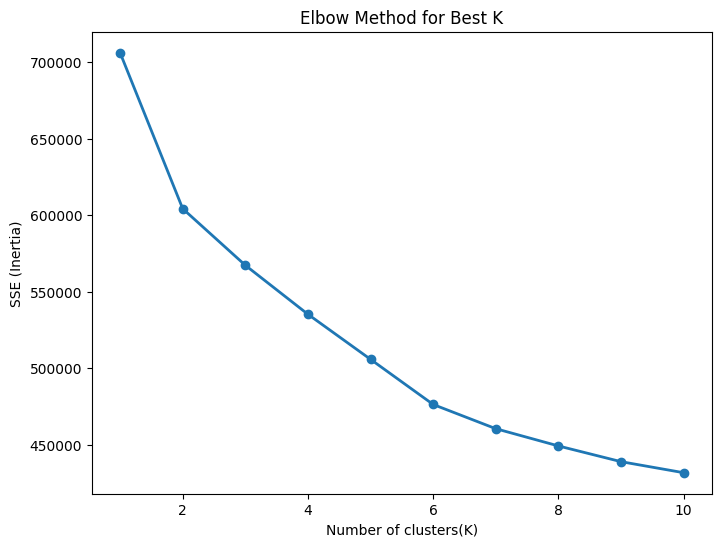

In [4]:
plt.figure(figsize=(8,6))
plt.plot(k_range, sse, 'o-',linewidth=2)
plt.xlabel('Number of clusters(K)')
plt.ylabel('SSE (Inertia)')
plt.title('Elbow Method for Best K')
plt.show()

In [5]:
## Use sample for finding Silhouette Score
import numpy as np
sample_index = np.random.choice(dataset.shape[0], 5000, replace=False)
sample_data = dataset.iloc[sample_index]
sample_data.shape

(5000, 13)

In [6]:
for k in range(2,11):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(sample_data)
    score = silhouette_score(sample_data, km.labels_)
    print(f"K : {k}  |  Silhouette_score : {score:.4f}")

K : 2  |  Silhouette_score : 0.1457
K : 3  |  Silhouette_score : 0.0996
K : 4  |  Silhouette_score : 0.1008
K : 5  |  Silhouette_score : 0.0978
K : 6  |  Silhouette_score : 0.0982
K : 7  |  Silhouette_score : 0.0948
K : 8  |  Silhouette_score : 0.1056
K : 9  |  Silhouette_score : 0.1036
K : 10  |  Silhouette_score : 0.0935


In [7]:
best_k = 2
km = KMeans(n_clusters=best_k, random_state=42)
labels = km.fit_predict(dataset)
dataset['Cluster'] = labels
dataset

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,key,mode,time_signature,duration_ms,Cluster
0,-0.212859,-1.732714,-1.341306,-0.174630,1.861715,-0.315507,1.546579,0.251632,0.461200,-0.341398,0.727049,-2.412542,-0.954017,0
1,-1.131650,-1.750687,-1.778656,0.135215,1.848893,-0.362718,-0.390420,-0.651159,-1.502171,1.358957,0.727049,-2.412542,0.124611,0
2,-0.564161,-1.633862,-1.816229,-0.017747,1.868126,-0.362718,2.461000,-0.448740,-1.790267,-1.474968,0.727049,0.239272,-0.139301,0
3,0.550548,-0.461113,-0.972612,2.057044,1.855304,-0.362718,0.504336,0.543116,0.342130,1.075564,-1.375422,0.239272,-0.945216,0
4,0.374897,-1.220479,-1.354551,1.527561,1.855304,-0.362718,2.018538,1.020827,-1.592345,1.075564,0.727049,0.239272,-0.840159,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54323,0.320850,0.361159,0.659750,-0.107955,-0.343688,-0.362718,1.428589,-0.922402,1.861785,0.792172,0.727049,0.239272,0.923133,1
54324,-0.125033,-0.470100,0.784900,-0.666854,0.441666,-0.362718,-0.429750,-0.930498,-1.376165,-1.191575,0.727049,0.239272,1.044767,0
54325,0.537036,-0.007291,0.659209,-0.378580,-0.949533,-0.362718,-0.026618,0.194955,1.647905,-1.191575,0.727049,0.239272,-0.721413,1
54326,-0.449313,0.464504,1.393623,-0.562918,-0.862984,-0.362718,-0.676545,-1.193644,0.352589,-0.341398,0.727049,0.239272,0.862204,1


In [8]:
dataset['Cluster'].value_counts()

Cluster
1    32514
0    21814
Name: count, dtype: int64

In [9]:
km.cluster_centers_

array([[-0.4769785 , -0.94457   , -0.69386104, -0.25848065,  0.81263644,
         0.04224103, -0.05930305, -0.58155066, -0.20667307, -0.02669668,
         0.08618484, -0.26669864, -0.09001021],
       [ 0.31934884,  0.63241285,  0.46455703,  0.17305915, -0.54408009,
        -0.02828141,  0.03970485,  0.38936247,  0.13837271,  0.01787409,
        -0.05770287,  0.1785613 ,  0.06026405]])

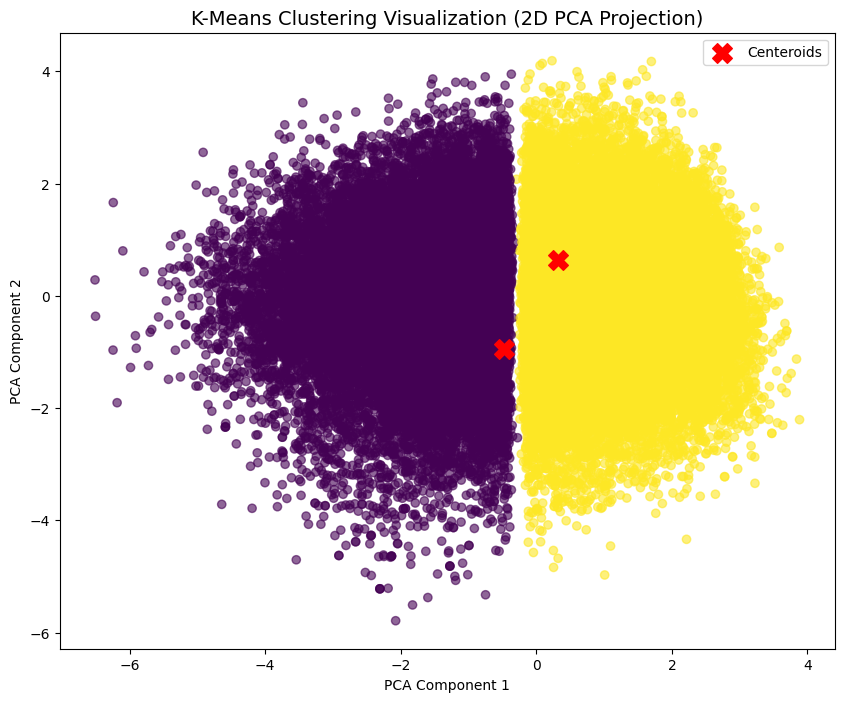

In [10]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, random_state=42)
df_pca = pca.fit_transform(dataset)

plt.figure(figsize=(10,8))
plt.scatter(df_pca[:,0], df_pca[:,1], c=labels,cmap='viridis', alpha=0.6)
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], s=200, c='red', marker='X',label='Centeroids')
plt.title("K-Means Clustering Visualization (2D PCA Projection)", fontsize=14)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.show()

In [11]:
with open('KmeansClustering.pkl', 'wb') as file:
    pickle.dump(km, file)

#### KMeans Cluster Evaluation Interpretation

In [14]:
from sklearn.metrics import silhouette_score, davies_bouldin_score
sil_score = silhouette_score(dataset, labels)
davies_score = davies_bouldin_score(dataset, labels)
inertia = km.inertia_

print(f"KMeans Silhouette score : {sil_score:.4f}")
print(f"Kmeans davies bouldin score : {davies_score:.4f}")
print(f"Kmeans Inertia : {inertia:2f}")

KMeans Silhouette score : 0.1641
Kmeans davies bouldin score : 2.1649
Kmeans Inertia : 604345.728741


In [16]:
cluster_summary = dataset.groupby('Cluster').mean().round(2)
print("\nCluster Feature Summary:")
print(cluster_summary)

for cluster, row in cluster_summary.iterrows():
    top_features = row.sort_values(ascending=False).head(3).index.tolist()
    print(f"Cluster {cluster} → Dominant features: {', '.join(top_features)}")


Cluster Feature Summary:
         danceability  energy  loudness  speechiness  acousticness  \
Cluster                                                              
0               -0.48   -0.94     -0.69        -0.26          0.81   
1                0.32    0.63      0.46         0.17         -0.54   

         instrumentalness  liveness  valence  tempo   key  mode  \
Cluster                                                           
0                    0.04     -0.06    -0.58  -0.21 -0.03  0.09   
1                   -0.03      0.04     0.39   0.14  0.02 -0.06   

         time_signature  duration_ms  
Cluster                               
0                 -0.27        -0.09  
1                  0.18         0.06  
Cluster 0 → Dominant features: acousticness, mode, instrumentalness
Cluster 1 → Dominant features: energy, loudness, valence


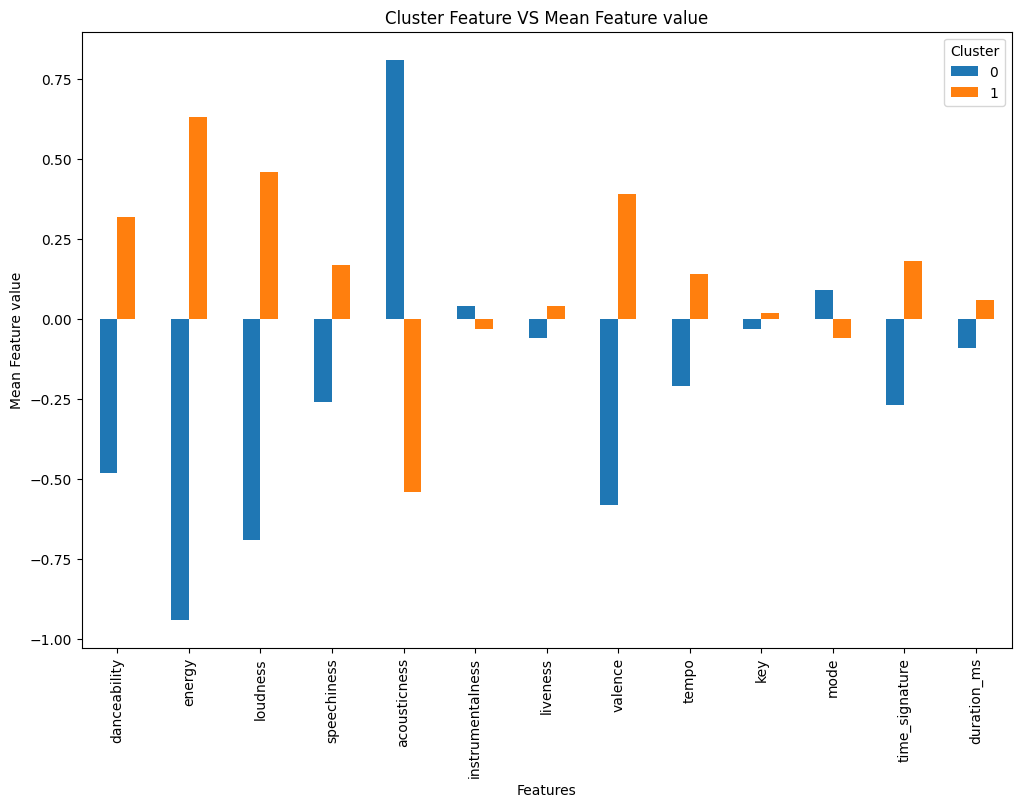

In [17]:
### Bar diagram for this Cluster
cluster_summary.T.plot(kind='bar', figsize=(12,8))
plt.title("Cluster Feature VS Mean Feature value")
plt.xlabel('Features')
plt.ylabel('Mean Feature value')
plt.show()

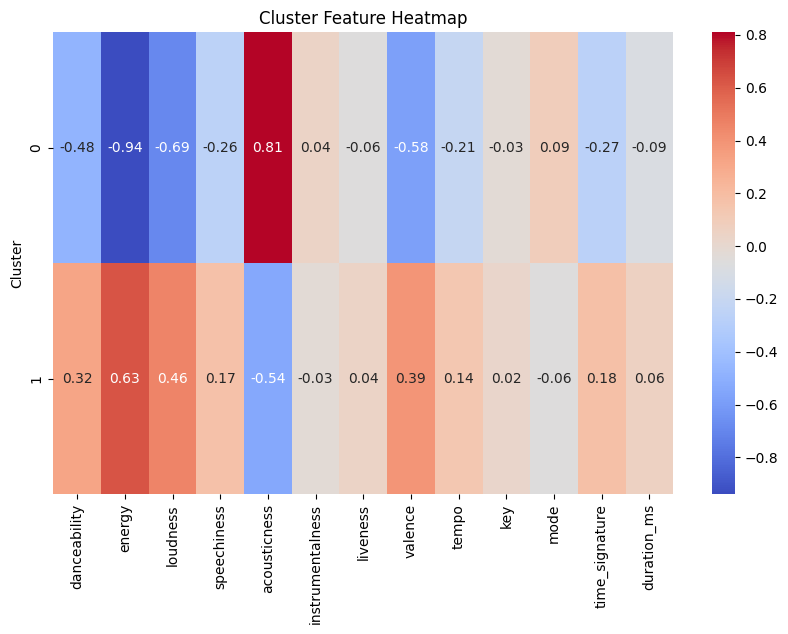

In [18]:
### HeatMap
import seaborn as sns

plt.figure(figsize=(10,6))
sns.heatmap(cluster_summary, annot=True, cmap='coolwarm')
plt.title("Cluster Feature Heatmap")
plt.show()

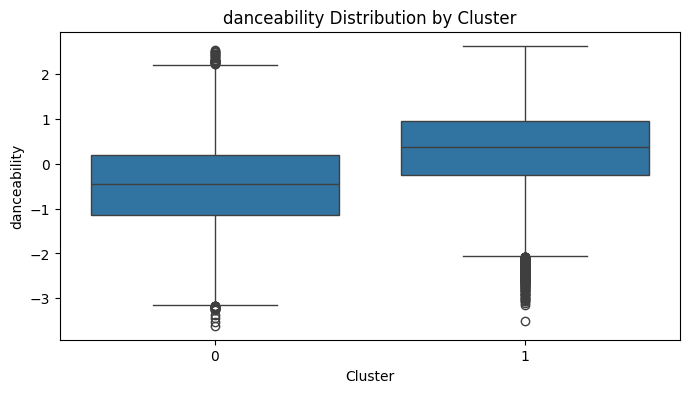

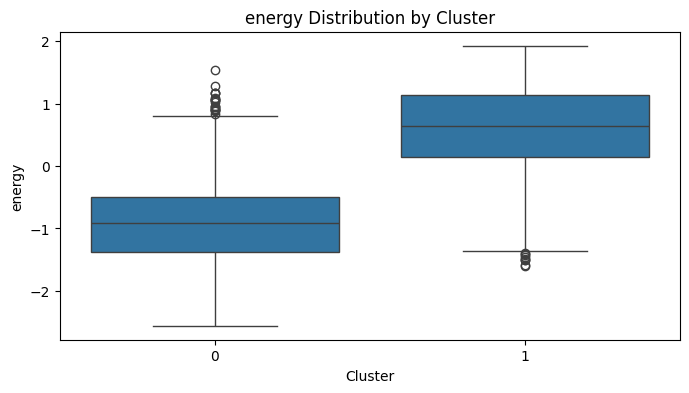

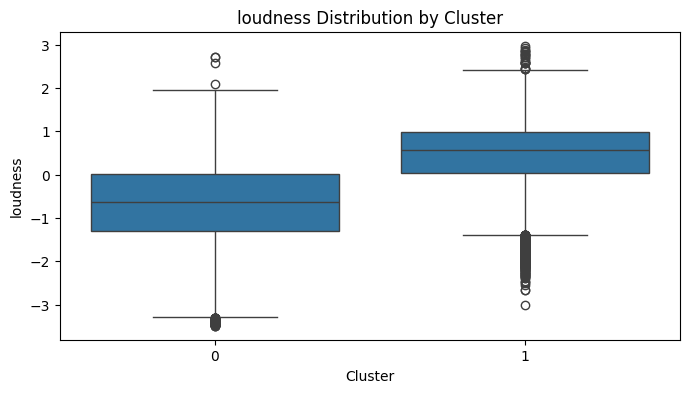

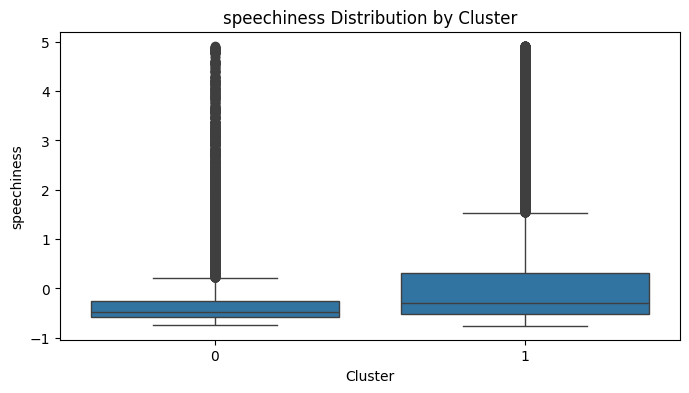

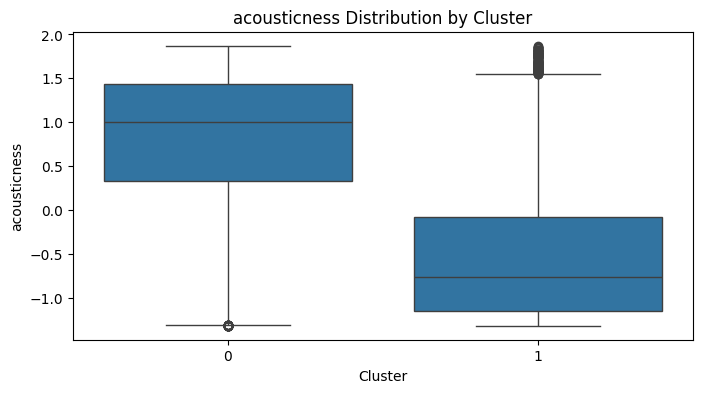

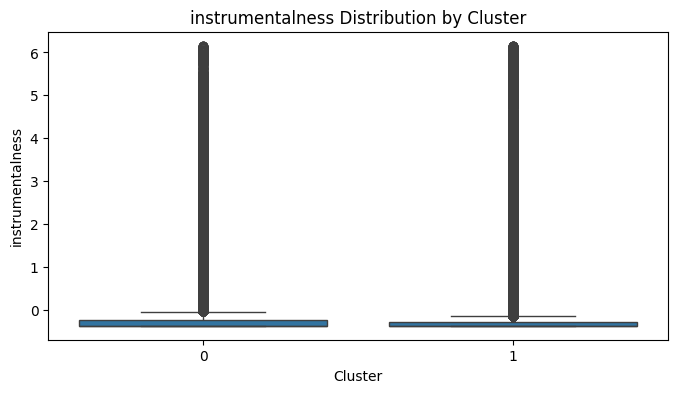

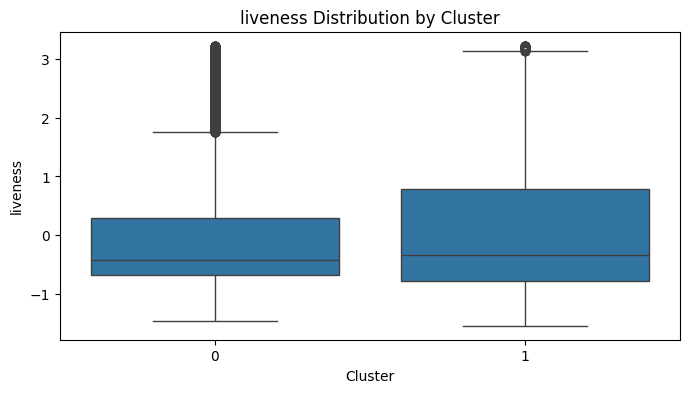

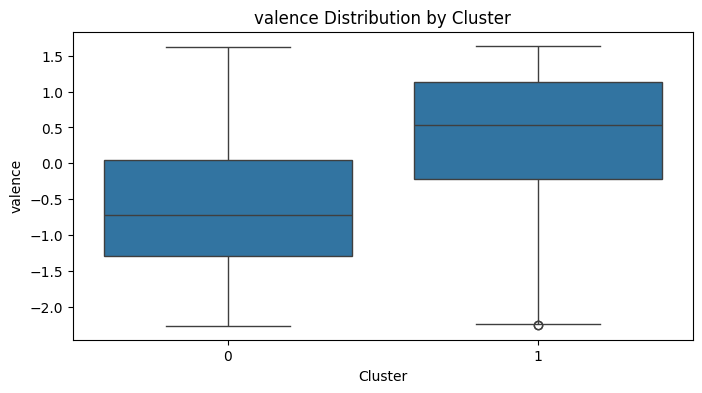

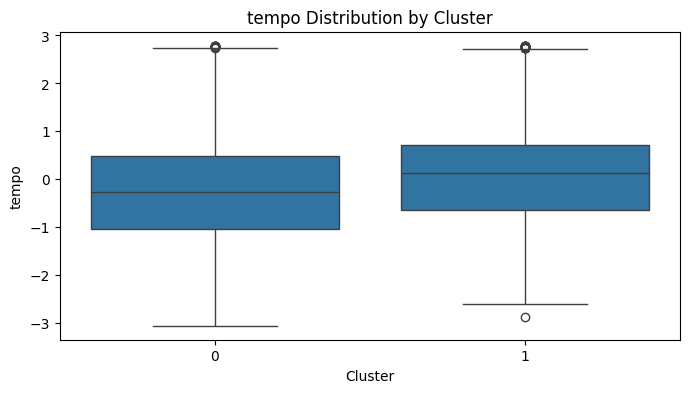

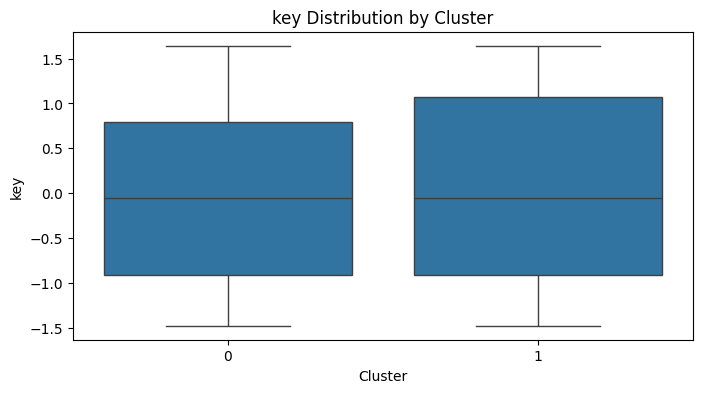

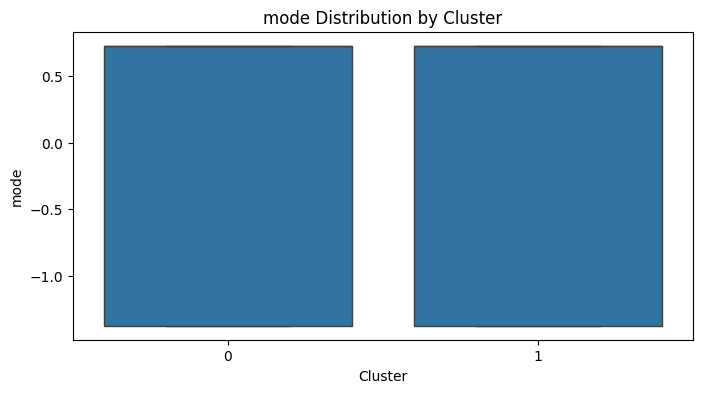

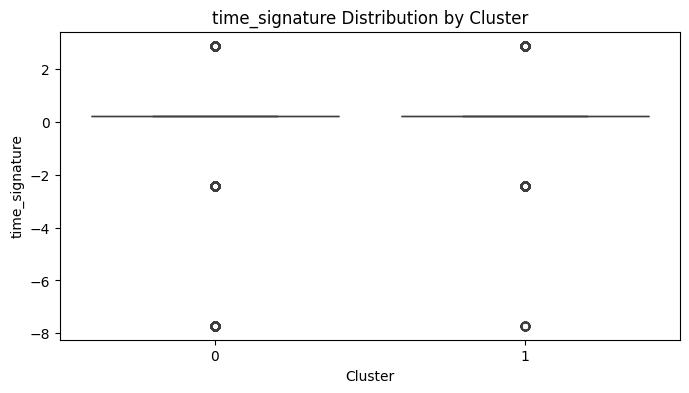

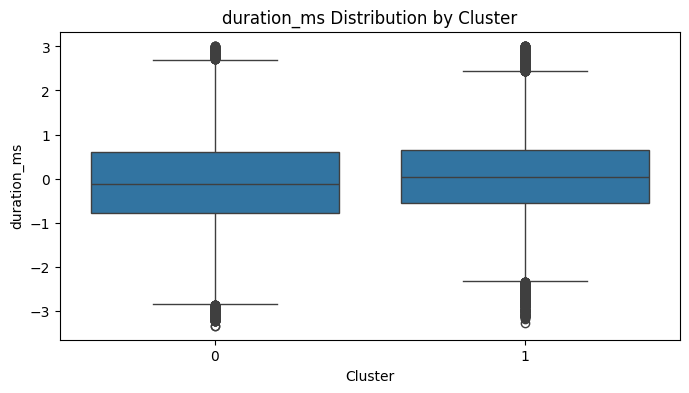

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

features = ['danceability', 'energy', 'loudness', 'speechiness','acousticness', 'instrumentalness', 'liveness',
    'valence', 'tempo', 'key', 'mode', 'time_signature', 'duration_ms']

for feature in features:
    plt.figure(figsize=(8,4))
    sns.boxplot(x='Cluster', y=feature, data=dataset)
    plt.title(f"{feature} Distribution by Cluster")
    plt.show()


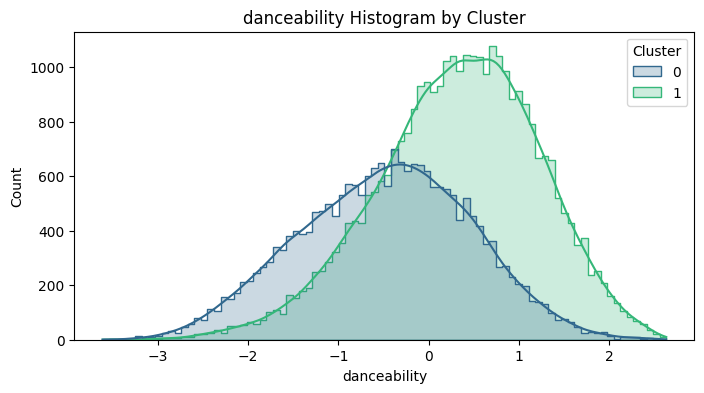

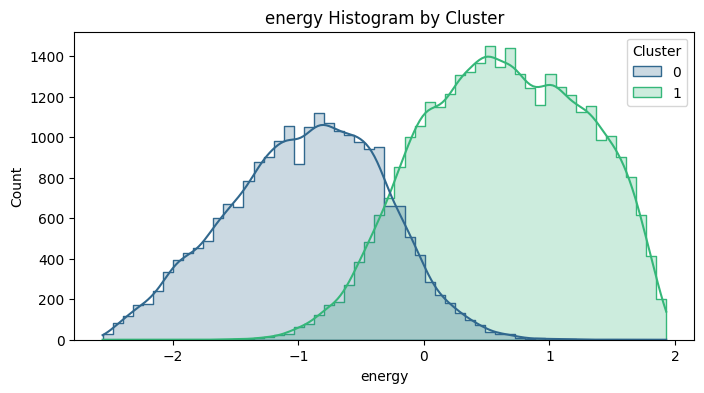

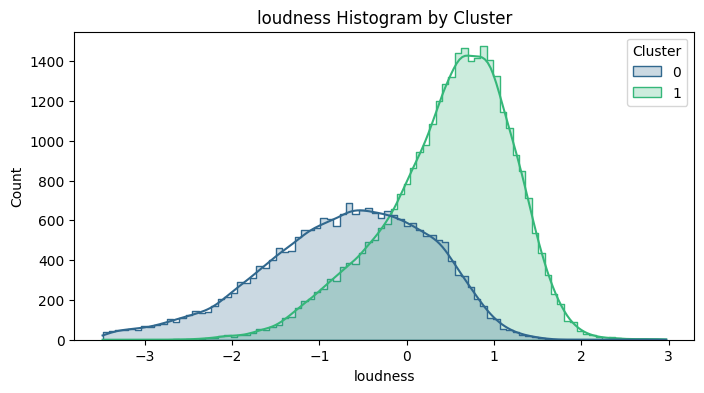

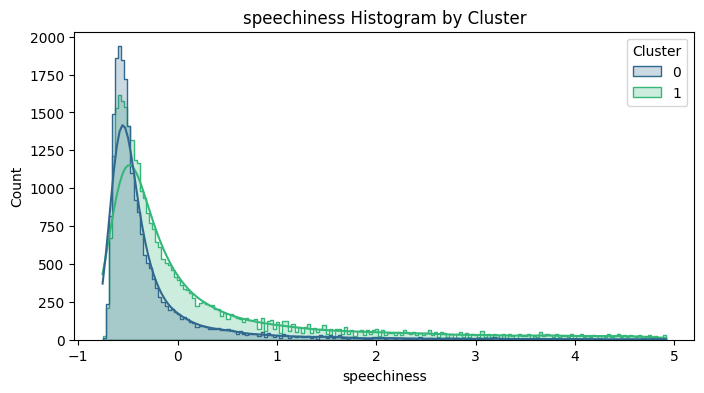

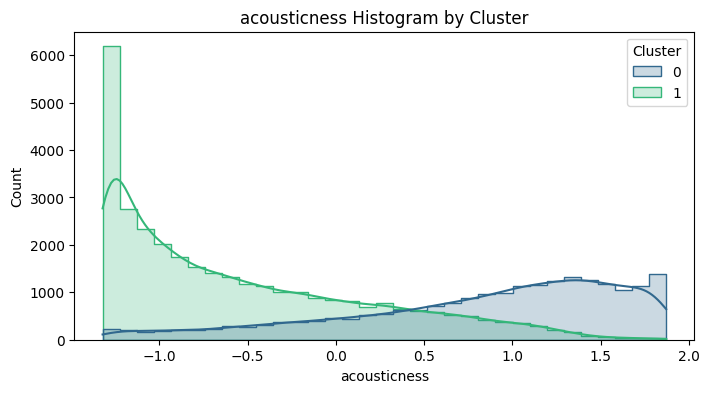

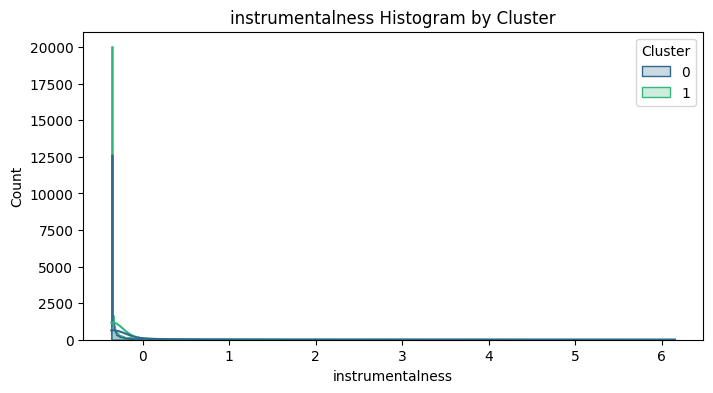

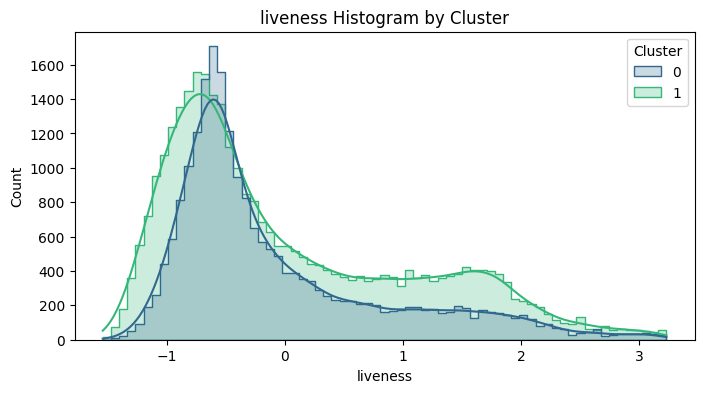

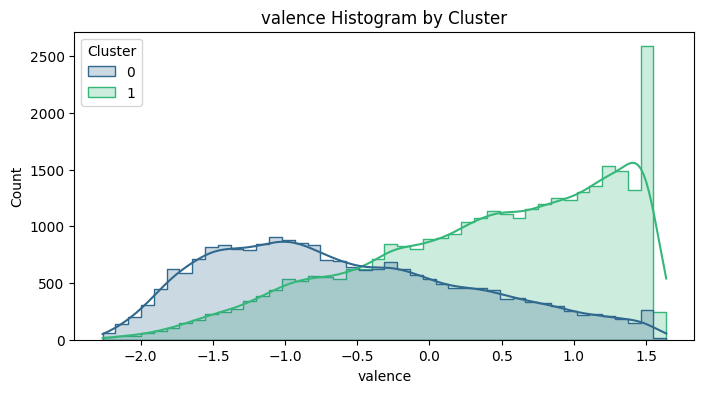

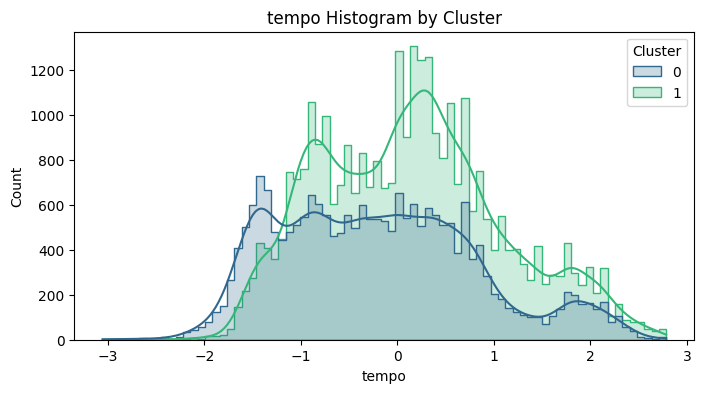

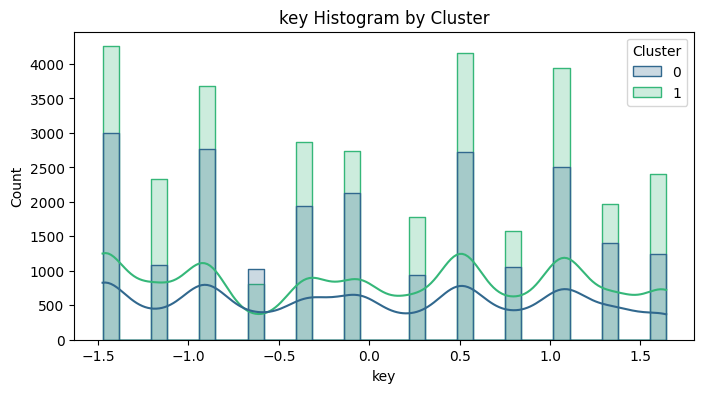

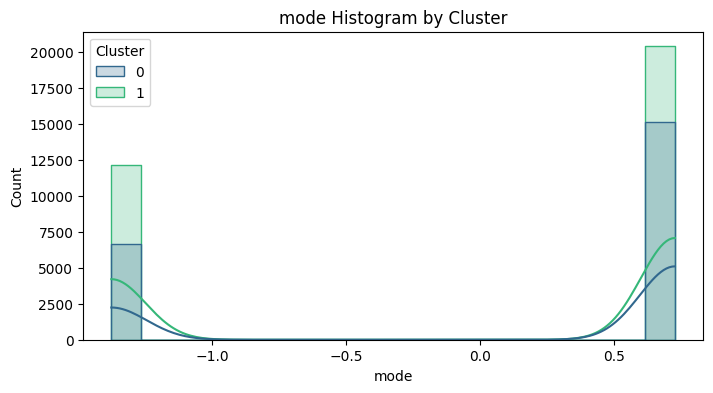

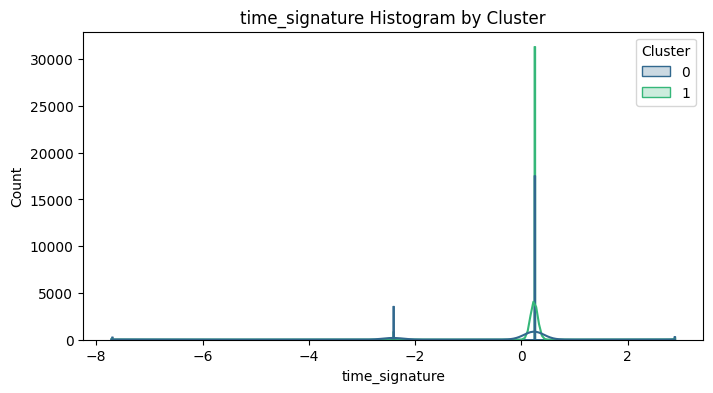

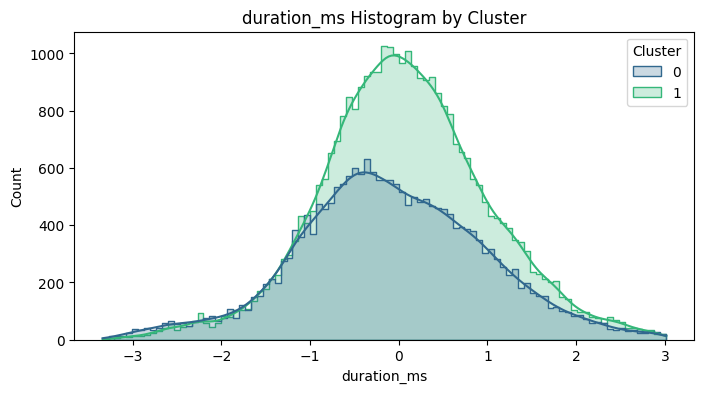

In [22]:
for feature in features:
    plt.figure(figsize=(8,4))
    sns.histplot(data=dataset, x=feature, hue='Cluster', kde=True, element="step", palette='viridis')
    plt.title(f"{feature} Histogram by Cluster")
    plt.show()


In [19]:
dataset.to_csv("amazon_music_Kmeansclusters.csv", index=False)
print("✅ Final Kmeans - clustered dataset saved as 'amazon_music_Kmeansclusters.csv'")

✅ Final Kmeans - clustered dataset saved as 'amazon_music_Kmeansclusters.csv'
